<a href="https://colab.research.google.com/github/SachinkumarSakthivel/PROJECT-1/blob/main/language_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [ ]:
device='cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
df1=pd.read_csv('/content/AMZN.csv')

In [ ]:
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...,...
6511,2023-03-30,101.550003,103.040001,101.010002,102.000000,102.000000,53633400
6512,2023-03-31,102.160004,103.489998,101.949997,103.290001,103.290001,56704300
6513,2023-04-03,102.300003,103.290001,101.430000,102.410004,102.410004,41135700
6514,2023-04-04,102.750000,104.199997,102.110001,103.949997,103.949997,48662500


In [ ]:
df=df1[['Date','Close']]

<ipython-input-6-bf71d85bcaed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=pd.to_datetime(df['Date'])


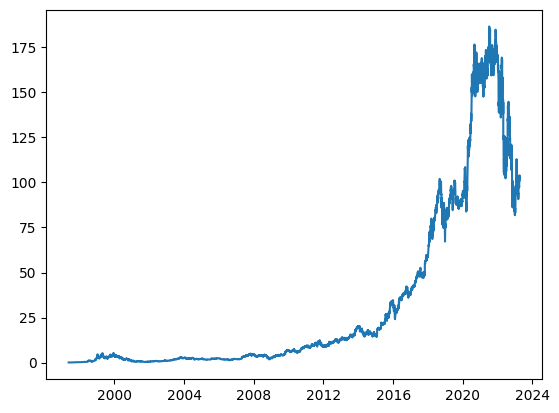

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
plt.plot(df['Date'],df['Close'])
plt.show()

In [ ]:
from copy import deepcopy as dc
def outcome(d,n_steps):
  d=dc(d)
  d.set_index('Date',inplace=True)
  for i in range(1,n_steps+1):
    d[f'date t-{i}']=d['Close'].shift(i)
  d.dropna(inplace=True)
  return d
d=df
steps=7
new_df=outcome(df,steps)
new_df

,Close,date t-1,date t-2,date t-3,date t-4,date t-5,date t-6,date t-7
Date,,,,,,,,
1997-05-27,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458,0.097917
1997-05-28,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458
1997-05-29,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417
1997-05-30,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771
1997-06-02,0.075521,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354
...,...,...,...,...,...,...,...,...
2023-03-30,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997,100.610001
2023-03-31,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997
2023-04-03,102.410004,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999


In [ ]:
convert_numpy=new_df.to_numpy()
convert_numpy

array([[7.91670000e-02, 7.50000000e-02, 6.97920000e-02, ...,
        8.54170000e-02, 8.64580000e-02, 9.79170000e-02],
       [7.65630000e-02, 7.91670000e-02, 7.50000000e-02, ...,
        8.17710000e-02, 8.54170000e-02, 8.64580000e-02],
       [7.52600000e-02, 7.65630000e-02, 7.91670000e-02, ...,
        7.13540000e-02, 8.17710000e-02, 8.54170000e-02],
       ...,
       [1.02410004e+02, 1.03290001e+02, 1.02000000e+02, ...,
        9.80400010e+01, 9.81299970e+01, 9.87099990e+01],
       [1.03949997e+02, 1.02410004e+02, 1.03290001e+02, ...,
        9.72399980e+01, 9.80400010e+01, 9.81299970e+01],
       [1.01099998e+02, 1.03949997e+02, 1.02410004e+02, ...,
        1.00250000e+02, 9.72399980e+01, 9.80400010e+01]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(-1,1))

data=scaler.fit_transform(convert_numpy)

data

array([[-0.99991063, -0.99995531, -1.        , ..., -0.99983244,
        -0.99982128, -0.99969839],
       [-0.99993855, -0.99991063, -0.99994415, ..., -0.99987154,
        -0.99983244, -0.99982128],
       [-0.99995253, -0.99993855, -0.99989946, ..., -0.99998325,
        -0.99987154, -0.99983244],
       ...,
       [ 0.09747299,  0.10690997,  0.09308121, ...,  0.0506149 ,
         0.05158   ,  0.05779984],
       [ 0.11398769,  0.09747299,  0.10691495, ...,  0.04203581,
         0.0506149 ,  0.05158   ],
       [ 0.08342464,  0.11398769,  0.09747802, ...,  0.07431453,
         0.04203581,  0.0506149 ]])

In [ ]:
x=convert_numpy[:,1:]
y=convert_numpy[:,0]
x.shape,y.shape

((6509, 7), (6509,))

In [ ]:
x=dc(np.flip(x,axis=1))

In [ ]:
split=int(len(x)*0.95)
split

6183

In [ ]:
x_train=x[:split]
x_test=x[split:]

y_train=y[:split]
y_test=y[split:]

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6183, 7), (326, 7), (6183,), (326,))

In [ ]:
x_train=x_train.reshape((-1,steps,1))
x_test=x_test.reshape((-1,steps,1))

y_train=y_train.reshape((-1,1))
y_test=y_test.reshape((-1,1))

x_train.shape,x_test.shape,y_train.shape,y_test.shape

(torch.Size([6183, 7, 1]),
 torch.Size([326, 7, 1]),
 torch.Size([6183, 1]),
 torch.Size([326, 1]))

In [ ]:
x_train=torch.tensor(x_train).float()
x_test=torch.tensor(x_test).float()

y_train=torch.tensor(y_train).float()
y_test=torch.tensor(y_test).float()

x_train.shape,x_test.shape,y_train.shape,y_test.shape

<ipython-input-21-7e1d94cc3e50>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train=torch.tensor(x_train).float()
<ipython-input-21-7e1d94cc3e50>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test=torch.tensor(x_test).float()
<ipython-input-21-7e1d94cc3e50>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train=torch.tensor(y_train).float()
<ipython-input-21-7e1d94cc3e50>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True)

(torch.Size([6183, 7, 1]),
 torch.Size([326, 7, 1]),
 torch.Size([6183, 1]),
 torch.Size([326, 1]))

In [ ]:
from torch.utils.data import Dataset

class tsdataset(Dataset):
  def __init__(self,x,y):
    self.x=x
    self.y=y

  def __len__(self):
    return len(self.x)

  def __getitem__(self,i):
    return self.x[i],self.y[i]

train_dataset = tsdataset(x_train,y_train)
test_dataset= tsdataset(x_test,y_test)

In [ ]:
train_dataset

In [ ]:
from torch.utils.data import DataLoader

batchsize=16

train_load=DataLoader(train_dataset,batch_size=batchsize,shuffle=True)
test_load=DataLoader(test_dataset,batch_size=batchsize,shuffle=False)

In [ ]:
for _,batch in enumerate(train_load):
  x_batch,y_batch=batch[0].to(device),batch[1].to(device)
  print(x_batch.shape,y_batch.shape)
  break

torch.Size([16, 7, 1]) torch.Size([16, 1])


In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [ ]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_load):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        # loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [ ]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_load):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_load)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')


In [ ]:
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 2779.653
Batch 200, Loss: 2754.898
Batch 300, Loss: 2736.182

Val Loss: 15376.406
***************************************************
Epoch: 2
Batch 100, Loss: 2685.185
Batch 200, Loss: 2771.368
Batch 300, Loss: 2494.220

Val Loss: 15376.406
***************************************************
Epoch: 3
Batch 100, Loss: 2870.456
Batch 200, Loss: 2775.724
Batch 300, Loss: 2607.655

Val Loss: 15376.406
***************************************************
Epoch: 4
Batch 100, Loss: 2622.016
Batch 200, Loss: 3026.113
Batch 300, Loss: 2632.389

Val Loss: 15376.406
***************************************************
Epoch: 5
Batch 100, Loss: 2377.082
Batch 200, Loss: 2711.232
Batch 300, Loss: 2808.948

Val Loss: 15376.406
***************************************************
Epoch: 6
Batch 100, Loss: 2671.928
Batch 200, Loss: 2640.544
Batch 300, Loss: 2809.473

Val Loss: 15376.406
***************************************************
Epoch: 7
Batch 100, Loss: 2740.649
Batch

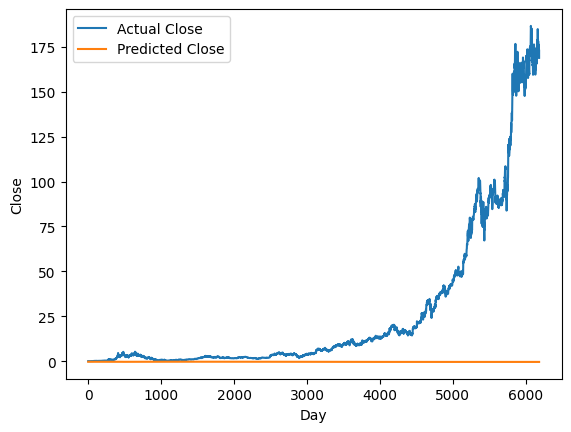

In [ ]:
with torch.no_grad():
    predicted = model(x_train.to(device)).to('cpu').numpy()

plt.plot(y_t rain, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [ ]:
train_predictions = predicted.flatten()

dummies = np.zeros((x_train.shape[0], steps+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([69.19937466, 69.20504672, 69.20374056, ..., 60.00576942,
       60.00578332, 60.00566382])

In [ ]:
dummies = np.zeros((x_train.shape[0], steps+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([  100.702974  ,   100.46015141,   100.33864667, ...,
       15861.07519642, 16254.91543858, 15840.51316463])

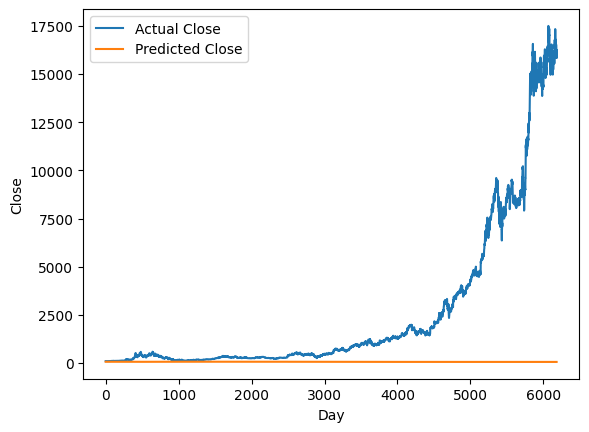

In [ ]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [ ]:
test_predictions = model(x_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((x_test.shape[0], steps+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([60.00578887, 60.00575552, 60.00585001, 60.00574441, 60.00572495,
       60.00572495, 60.00576664, 60.00573607, 60.00578054, 60.00579721,
       60.00586113, 60.00574441, 60.00583334, 60.00595006, 60.00599452,
       60.00602509, 60.00607234, 60.00591115, 60.00591671, 60.00608623,
       60.00604455, 60.0061974 , 60.00634469, 60.00665316, 60.00750078,
       60.00728957, 60.00783426, 60.00798711, 60.00788151, 60.00735071,
       60.00681713, 60.00668651, 60.00673375, 60.00798989, 60.00626687,
       60.0062502 , 60.00607512, 60.00608623, 60.00619462, 60.00653644,
       60.00641138, 60.00633079, 60.00624186, 60.00644473, 60.00658368,
       60.0067671 , 60.007259  , 60.00667539, 60.00650309, 60.00651699,
       60.00669207, 60.00662259, 60.00696164, 60.00717563, 60.00819276,
       60.00841787, 60.00792875, 60.00706168, 60.00718952, 60.00759526,
       60.00700888, 60.00654756, 60.0062891 , 60.00608345, 60.00607234,
       60.00593061, 60.00598897, 60.00597785, 60.00593338, 60.00

In [ ]:
dummies = np.zeros((x_test.shape[0], steps+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([15947.4240623 , 15673.40877222, 15984.6778936 , 16042.49233381,
       16045.42915712, 15914.97244934, 16007.42973695, 15871.28577977,
       15819.3919412 , 15639.65237875, 15983.5111324 , 15714.719233  ,
       15419.58271949, 15316.72845131, 15251.45385383, 15151.86224836,
       15513.29925547, 15498.84564542, 15126.49942111, 15212.66188978,
       14912.35036349, 14668.17570248, 14236.28908512, 13394.75688001,
       13572.02490075, 13146.99087111, 13043.15766182, 13114.49372601,
       13519.24460825, 14041.02448434, 14192.08875605, 14137.91119587,
       13040.64058797, 14793.17709022, 14820.77952982, 15145.10214781,
       15124.21427662, 14920.36971241, 14387.91397136, 14562.61796323,
       14687.89823535, 14836.16512595, 14514.63988906, 14323.38496274,
       14099.21171898, 13598.41362413, 14207.42882004, 14434.07218263,
       14413.04486924, 14187.28653771, 14272.19118089, 13884.83073201,
       13674.31997729, 12910.79002686, 12776.64948403, 13081.06459482,
      

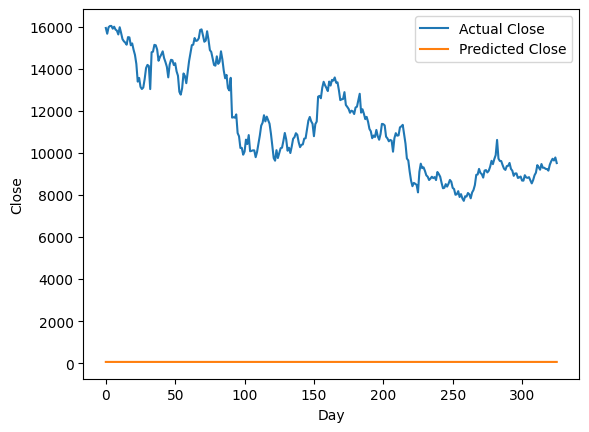

In [ ]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()
